# **Library**

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **Pengumpulan Data**

In [340]:
dir = 'hungarian.data'
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

# **Menelaah Data**

In [341]:
data = itertools.takewhile(lambda x: len(x) == 76,
  (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
  )
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

# **Validasi Data**

In [343]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)
df = df.astype(float)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [345]:
# Ubah nilai -9.0 menjadi NaN
df.replace('-9.0', np.nan, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,-9.0,2.0,140.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,0.0,49.0,0.0,1.0,0.0,0.0,-9.0,3.0,160.0,1.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,0.0,37.0,1.0,1.0,0.0,0.0,-9.0,2.0,130.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
3,0.0,48.0,0.0,1.0,1.0,1.0,-9.0,4.0,138.0,0.0,...,-9.0,2.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,0.0,54.0,1.0,1.0,0.0,1.0,-9.0,3.0,150.0,0.0,...,-9.0,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


In [346]:
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
     ..
70    0
71    0
72    0
73    0
74    0
Length: 74, dtype: int64

# **Menentukan Objek Data**

In [347]:
seleksi_kolom = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]

selected_df = df[seleksi_kolom]

selected_df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

selected_df = selected_df.astype(float)
selected_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [348]:
selected_df.value_counts()

age   sex  cp   trestbps  chol    fbs   restecg  thalach  exang  oldpeak  slope  ca    thal  target
49.0  0.0  2.0  110.0     -9.0     0.0  0.0      160.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       2
52.0  0.0  4.0  130.0      180.0   0.0  0.0      140.0    1.0    1.5       2.0   -9.0  -9.0  0.0       1
53.0  0.0  3.0  120.0      274.0   0.0  0.0      130.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
           2.0  140.0      216.0   0.0  0.0      142.0    1.0    2.0       2.0   -9.0  -9.0  0.0       1
                113.0      468.0  -9.0  0.0      127.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
                                                                                                      ..
45.0  0.0  2.0  180.0     -9.0     0.0  0.0      180.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
                130.0      237.0   0.0  0.0      170.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
44.0  1.0  4.0  150.0      412.0   0.0  0.0      170.0    0.

In [349]:
selected_df.drop(columns=['slope','ca','thal'],inplace=True)

# **Membersihkan Data**

In [350]:
#Membersihkan nilai duplikat
duplikat = selected_df.drop_duplicates(inplace=True)

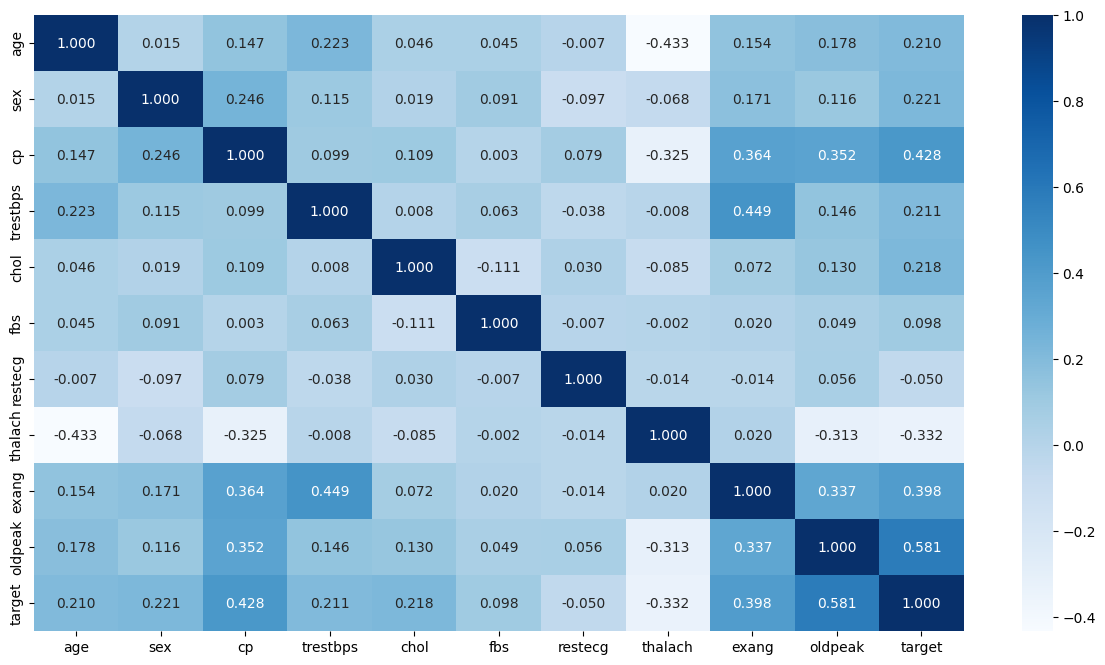

In [351]:
imputer = SimpleImputer(strategy='mean')
selected_df = pd.DataFrame(imputer.fit_transform(selected_df), columns=selected_df.columns)

plt.figure(figsize=(15,8))
sns.heatmap(selected_df.corr(), annot=True, cmap='Blues', fmt='.3f')
plt.show()

# **Konstruksi Data**

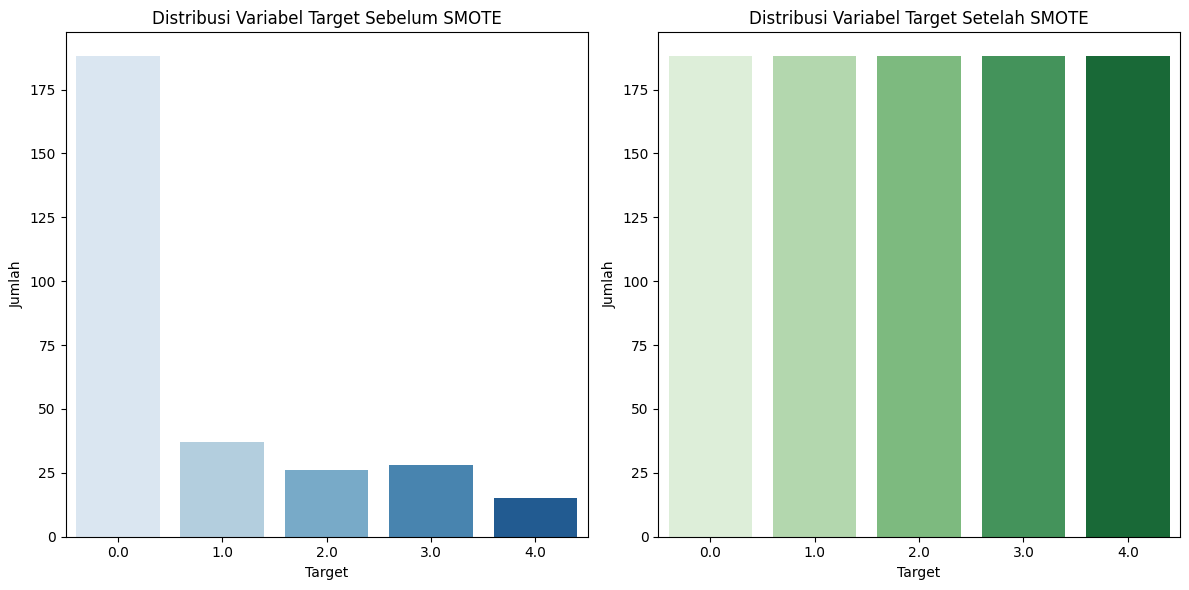

In [352]:
# Step 1: Membagi data menjadi fitur (X) dan target (y)
X = seleksi_df.drop(columns=['num'])
y = seleksi_df['num']

# Plot distribusi variabel target sebelum menerapkan SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='Blues')
plt.title('Distribusi Variabel Target Sebelum SMOTE')
plt.xlabel('Target')
plt.ylabel('Jumlah')

# Step 3: Menerapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Plot distribusi variabel target setelah menerapkan SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_res, palette='Greens')
plt.title('Distribusi Variabel Target Setelah SMOTE')
plt.xlabel('Target')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


# **Pemodelan**

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74        36
         1.0       0.84      0.69      0.76        45
         2.0       0.69      0.79      0.74        43
         3.0       0.79      0.71      0.75        38
         4.0       0.81      0.96      0.88        26

    accuracy                           0.77       188
   macro avg       0.77      0.78      0.77       188
weighted avg       0.77      0.77      0.76       188



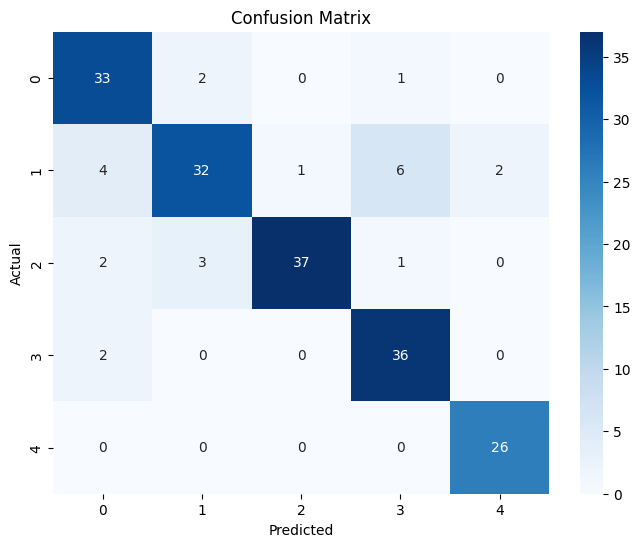

In [371]:
# Inisialisasi dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi menggunakan accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Menampilkan classification report dan confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Evaluasi menggunakan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74        36
         1.0       0.84      0.69      0.76        45
         2.0       0.69      0.79      0.74        43
         3.0       0.79      0.71      0.75        38
         4.0       0.81      0.96      0.88        26

    accuracy                           0.77       188
   macro avg       0.77      0.78      0.77       188
weighted avg       0.77      0.77      0.76       188



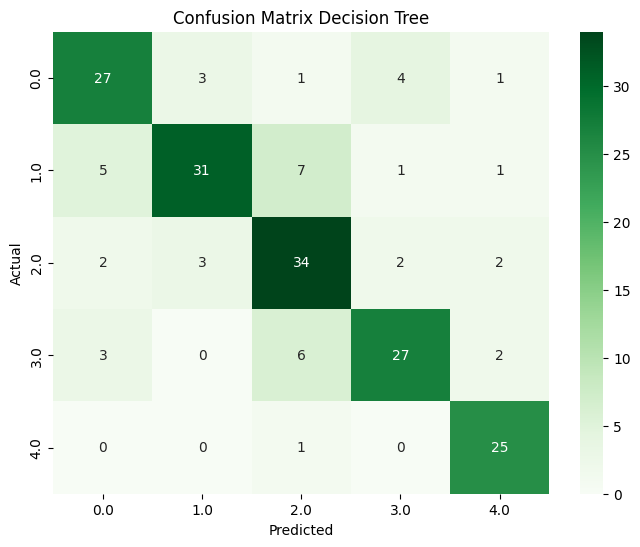

In [372]:
# Inisialisasi model
dt = DecisionTreeClassifier(random_state=42)

# Melatih model
dt.fit(X_train, y_train)

# Memprediksi nilai target pada data uji
y_pred_dt = dt.predict(X_test)

# Menghitung akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

# Menampilkan classification report dan confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix Decision Tree')
plt.show()


Akurasi Gradient Boosting Classifier: 0.87
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91        36
         1.0       0.88      0.78      0.82        45
         2.0       0.90      0.84      0.87        43
         3.0       0.87      0.87      0.87        38
         4.0       0.84      1.00      0.91        26

    accuracy                           0.87       188
   macro avg       0.87      0.89      0.88       188
weighted avg       0.87      0.87      0.87       188



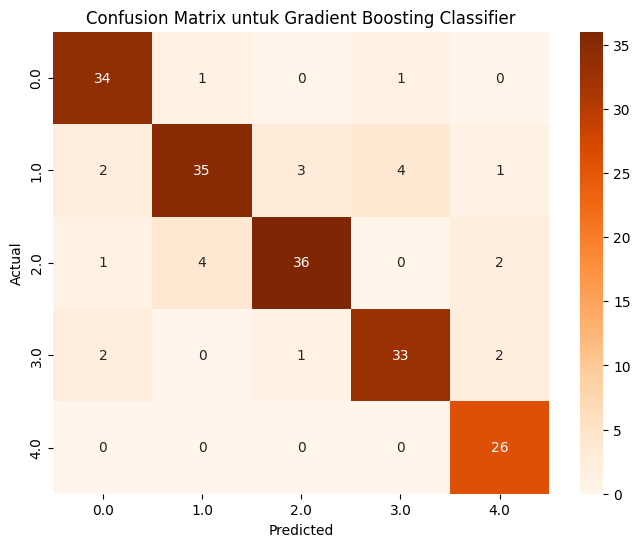

In [373]:
# Inisialisasi model
gboost = GradientBoostingClassifier(random_state=42)

# Melatih model
gboost.fit(X_train, y_train)

# Memprediksi nilai target pada data uji
y_pred_gboost = gboost.predict(X_test)

# Menghitung akurasi
accuracy_gboost = accuracy_score(y_test, y_pred_gboost)
print(f"Akurasi Gradient Boosting Classifier: {accuracy_gboost:.2f}")

# Menampilkan classification report dan confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_gboost))

# Confusion matrix
cm_gboost = pd.crosstab(y_test, y_pred_gboost, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gboost, annot=True, cmap='Oranges', fmt='d')
plt.title('Confusion Matrix untuk Gradient Boosting Classifier')
plt.show()

# **Evaluasi**

In [374]:
# Cetak akurasi untuk masing-masing model
print(f'Akurasi Random Forest Classifier: {accuracy:.2f}')
print(f'Akurasi Decision Tree Classifier: {accuracy_dt:.2f}')
print(f'Akurasi Gradient Boosting Classifier: {accuracy_gboost:.2f}')

Akurasi Random Forest Classifier: 0.87
Akurasi Decision Tree Classifier: 0.77
Akurasi Gradient Boosting Classifier: 0.87


# **Uji Coba Implementasi**

In [382]:
input_data = (63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3)

# Mengubah input data menjadi array NumPy
input_data = np.asarray(input_data)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Tidak ada penyakit jantung')
else:
  print('Terkena penyakit jantung')

[3.]
Terkena penyakit jantung


# **Simpan model**

In [383]:
import pickle

In [385]:
filename = 'prediksi.sav'
pickle.dump(model, open(filename, 'wb'))